# Python Seaborn tutorial
---
*by [Georgii Budnik](https://github.com/Goshmar)*


What is Seaborn? [Seaborn](https://seaborn.pydata.org/) is a statistical plotting library in Python. It is based on [Matplotlib](https://matplotlib.org/) and interacts closely with [Pandas](https://pandas.pydata.org/) data structures.

The Seaborn architecture allows you to quickly explore and understand your data. Seaborn captures entire dataframes or arrays that contain all of your data and performs all the internal functions needed for semantic mapping and statistical aggregation to transform the data into informative graphs. It abstracts away the complexity, allowing you to design graphs according to your needs.



##Installation and first compiling


Installing Seaborn is as easy as any other thread, you will soon need your favorite Python package manager for this. During installation, the Seaborn library is installed in all dependencies, including matplotlib, pandas, numpy, and scipy. Use it: 

```
pip3 install seaborn
```

And download [CSV-file](https://disk.yandex.ru/i/x5D62g4vOG_GRw) for practice.

Before we start plotting, we need data. The beauty of seaborn is that it works directly with pandas dataframe objects, which makes it very convenient. What's more, the library comes with some built-in datasets that you can use right from the code without manually loading files.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
df = sns.load_dataset('tips')
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


##.displot(data[column_name])

For a simple introduction to the topic of plotting, let's look at the [.displot](https://seaborn.pydata.org/generated/seaborn.displot.html) plot for the check size distribution:

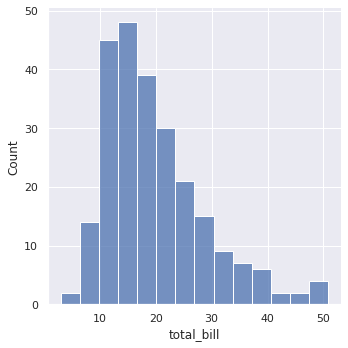

In [3]:
sns.displot(df['total_bill'])

##.jointplot(x, y, data=data)


[.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) shows the difference between different parametrs (e. g. 'total_bill' and 'tip'):

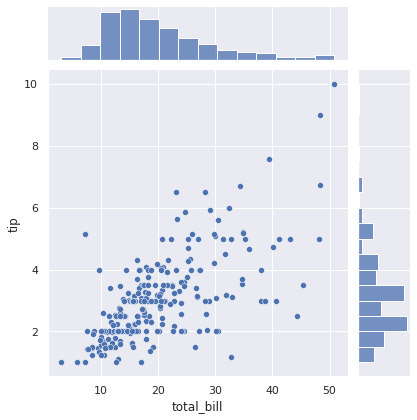

In [4]:
sns.jointplot(x='total_bill', y='tip', data=df)

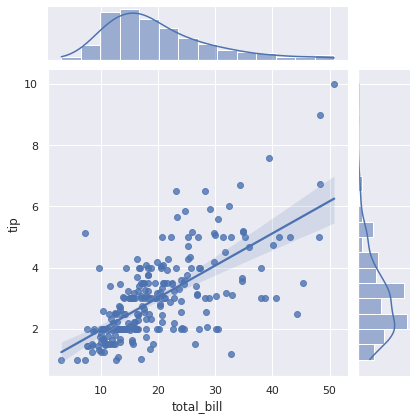

In [5]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='reg')
# seaborn has a lot of characteristics and parametrs for drawing
# For example, 'kid'=reg shows linear regression for our pair values

##.kdeplot(data[column_name]) & .rugplot(data[column_name])


[.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) and [.rugplot](https://seaborn.pydata.org/generated/seaborn.rugplot.html) how probability density function. The denser the lines, the higher the density. It is better to use it in conjunction with other types of graphs.

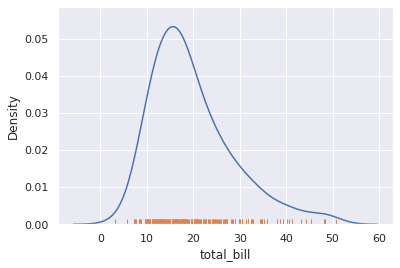

In [6]:
sns.kdeplot(df['total_bill'])

sns.rugplot(df['total_bill'])

##.pairplot(data)


Another quick and visual way to display the histograms of the distribution of quantitative features and the features of the relationships between them is to build [.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) type graph - it shows the relationship between all pairs of variables:

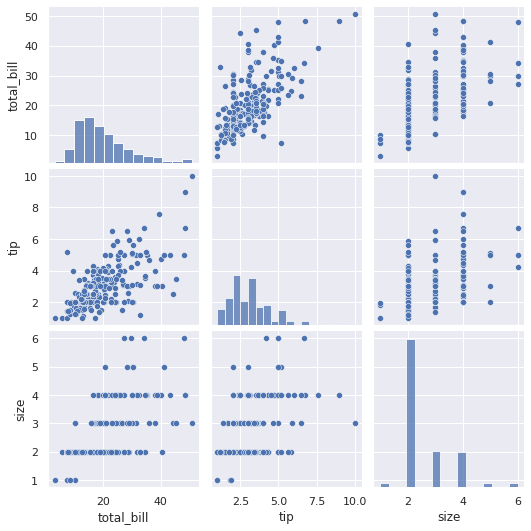

In [7]:
sns.pairplot(df)

If you want compare other features with same chracteristics (group by), you can use "hue" parametrs. For example, grouping by "sex" (using palette = 'Set1'):

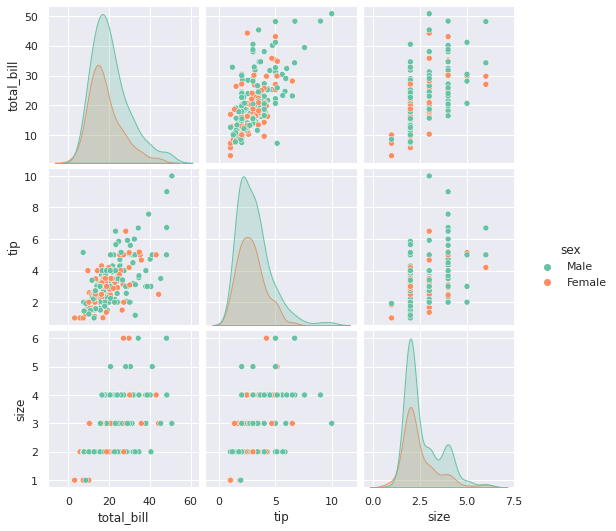

In [8]:
sns.pairplot(df, hue='sex', palette='Set2')

`.pairplot` method is a simplified version of another function called .PairGrid (we will display feature distribution histograms along the diagonal, feature distribution density over the diagonal, and feature distribution density plots below the diagonal):

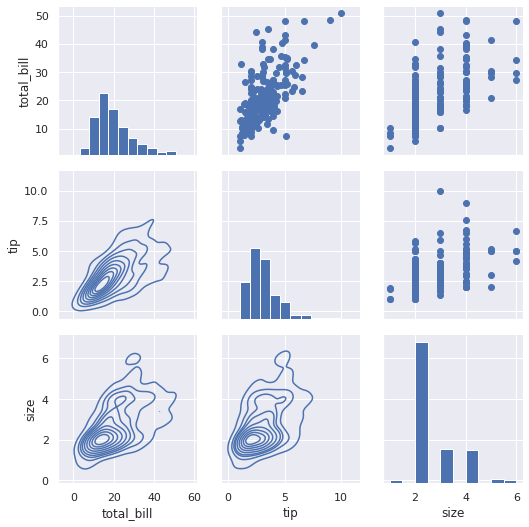

In [9]:
fig=sns.PairGrid(df) # Create the grid (3 x 3)

fig.map_diag(plt.hist) # on the diagonal - featur distribution histograms

fig.map_upper(plt.scatter) # over - feature distribution density

fig.map_lower(sns.kdeplot) # below - feature distribution density

##.FacetGrid(data, column=column_name, row=row_name)

[.FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) allows you visualize joint-distribution for independent features:


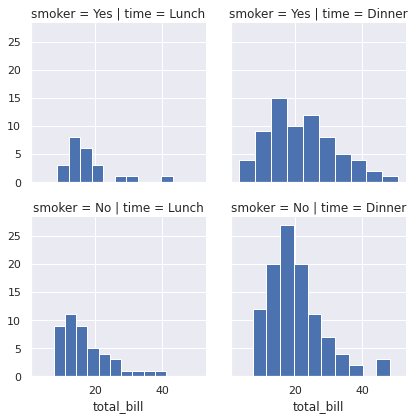

In [10]:
fig=sns.FacetGrid(df, col="time", row="smoker")

fig=fig.map(plt.hist, "total_bill")

##.countplot(x=name_column, data=data)

To draw a categorical histogram by columns, you can use [.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) using one of axis:

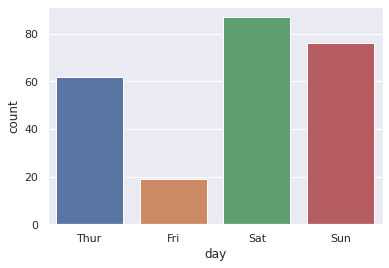

In [11]:
sns.countplot(x='day', data=df)

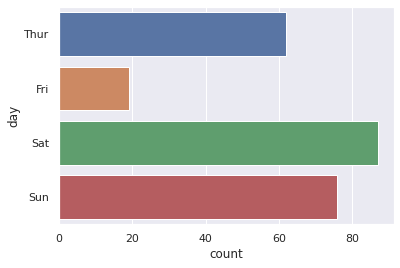

In [12]:
sns.countplot(y='day', data=df)

##.barplot(x=grouping_column_name, y=column_name, data=data)


Categorical values when plotting graphs can be used as one of the parameters of the [.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html). It allows you to divide the dataframe into groups depending on the value of a categorical variable.

By default, for each group, the mean value of the specified quantitative variable is calculated. Instead of the average value, you can calculate any other statistical characteristic, the name of which is specified in the estimator parameter.

Let's show that the average check of male clients is slightly higher than the average check of female clients.

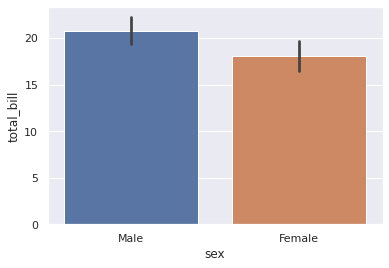

In [13]:
sns.barplot(x='sex', y='total_bill', data=df)

## .boxplot(x=group_column_name, y=column_name, data=data) & .violinplot(x=group_column_name, y=column_name, data=data)

[.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) method allows you to display the distribution of a given quantitative attribute by categories, which are determined by the value of a given qualitative attribute.

*  Rectangle - displays the boundaries of the main data volume. The left border is the value of the 25% quantile, or Q1, the first quarter. The right border is the 75% quantile, or Q3, third quarter)

*  Straight - line reflecting the range of values of the data set

*  Outliers - values behind the left and right "extreme" values on the axis

*  ["Whiskers"](https://en.wikipedia.org/wiki/Box_plot) are marks on the axis representing the left and right "extreme" values of the data. In fact, these values are not always the minimum or maximum of the set. They represent values that are 1.5 * IQR to the left or right of the left (Q1) or right (Q3) boundary, respectively. Here IQR - Interquartile Range - the width of the rectangle from Q1 to Q3

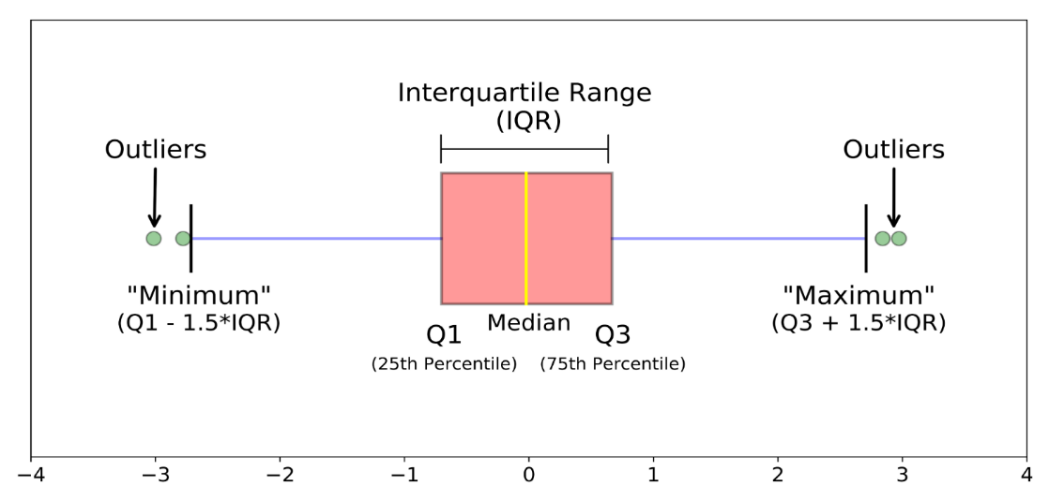

The diagram below shows how the check amount changed depending on the day of the week:

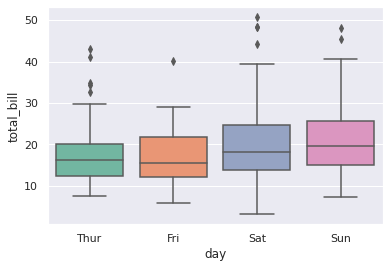

In [14]:
sns.boxplot(x="day", y="total_bill", data=df, palette='Set2')

 For comparing with other features, also we can use "hue" parametr:

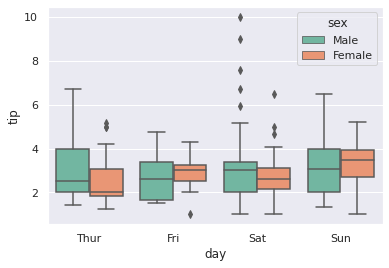

In [15]:
sns.boxplot(x='day', y='tip', data=df, hue='sex', palette='Set2')

[violinplot.](https://seaborn.pydata.org/generated/seaborn.violinplot.html) method performs the same function as boxplot. In fact, these are two plots of distribution density rotated by 90 and -90 degrees, sticking together with each other:

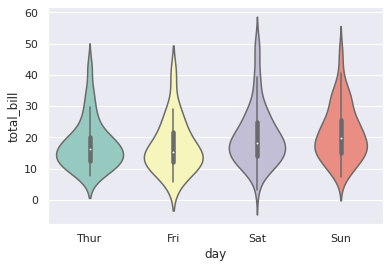

In [16]:
sns.violinplot(x="day", y="total_bill", data=df, palette='Set3')

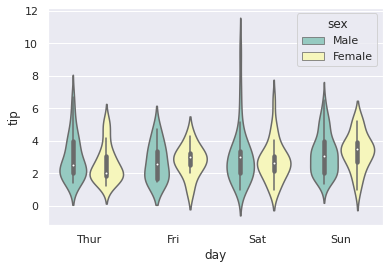

In [17]:
sns.violinplot(x='day', y='tip', data=df, hue='sex', palette='Set3')

##.stripplot(x=grouping_column_name, y=column_name, data=data) & .swarmplot(x=grouping_column_name, y=column_name, data=data)

[.stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html) shows a scatterplot consisting of a single categorical variable, and [.swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) is also a scatterplot, with the only difference that the points do not overlap:

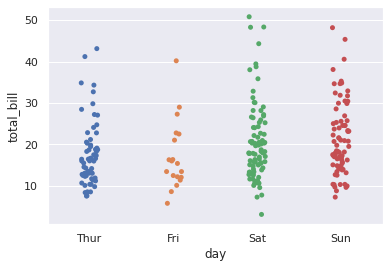

In [18]:
sns.stripplot(x="day", y="total_bill", data=df)

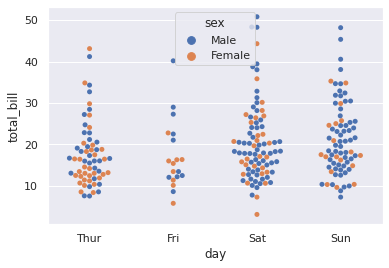

In [19]:
sns.swarmplot(x="day", y="total_bill", hue='sex', data=df)

##.catplot(x=grouping_column_name, y=column_name, data=data, kind=graph_type)

[.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) - method for displaying categorical plots on a `.FacetGrid`. This method provides access to several features that show the relationship between a numeric and one or more categorical variables using one of several visual representations.

`kind` parametr specifies the type of function:

1.   Categorical scatterplots:
  *   stripplot() (`kind="strip"`; default)
  *   swarmplot() (`kind="swarm"`)
2.   Categorical distribution of features:
  *   boxplot() (`kind="box"`)
  *   violinplot() (`kind="violin"`)
  *   boxenplot() (`kind="boxen"`)
3.   Categorical assessment of features:
  *   pointplot() (`kind="point"`)
  *   barplot() (`kind="bar"`)
  *   countplot() (`kind="count"`)

Let's look at a few usage examples:


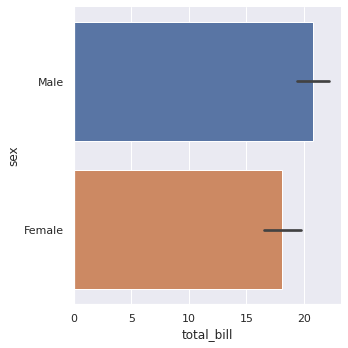

In [21]:
sns.catplot(x='total_bill', y='sex', data=df, kind='bar')

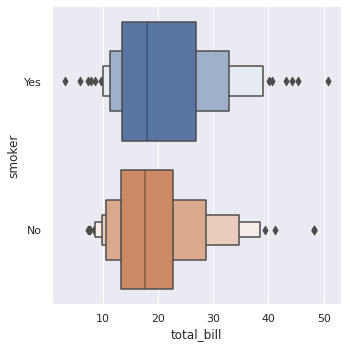

In [25]:
sns.catplot(x='total_bill', y='smoker', data=df, kind='boxen')

##.heatmap(cor_data, annot=bool, cmap=name)

The degree of relationship between two quantities in Seaborn helps evaluate [correlation analysis](https://www.questionpro.com/features/correlation-analysis.html#:~:text=What%20is%20correlation%20analysis%3F,the%20change%20in%20the%20other.). The value of the degree of connection (correlation coefficient) can vary from [ -1, +1]: the closer the absolute value of the coefficient is to one, the stronger the relationship between the features.

A heuristic evaluation of a value can be given like this:
   * < 0.2 - very weak
   * < 0.5 - weak
   * < 0.7 - medium
   * < 0.9 - high
   * more 0.9 - very high

(The correlation coefficient of a parameter with itself is always equal to one)

For using [.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html), let's find correlations between quantitative features contained in the dataframe using the [.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method, and to display the values of the correlation coefficients in the heat map, set the parameter `annot=True`. To use brighter colors, set the color palette:

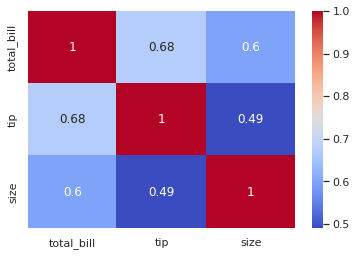

In [26]:
cor_df=df.corr()
sns.heatmap(cor_df, annot=True, cmap='coolwarm')

Based on the heatmap, the following conclusions can be drawn:

*   The amount of the check depends on the number of visitors at the table: coefficient = 0.6 - the average degree of dependence
*   The tip amount is moderately dependent on the amount of the check (0.68) and weakly dependent (0.49) on the number of visitors at the table



##Conventions


Plot parameters: dimensions, axis labels, labels on the axes, etc. are set by the Matplotlib methods:


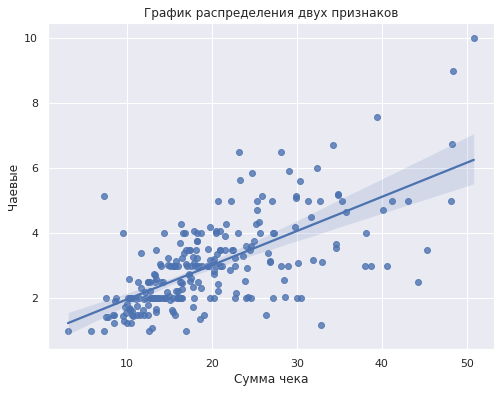

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x='total_bill', y='tip', data=df, ax=ax)
ax.set_title('График распределения двух признаков')
plt.xlabel('Сумма чека')
plt.ylabel('Чаевые')
fig.savefig('filename.png', dpi=150)
plt.show()

##Demonstrating the benefits of Seaborn over standard Matplotlib methods

To display information about qualitative features on diagrams using the methods of the Pandas and Matplotlib libraries, it is necessary to pre-process the dataframe by grouping the necessary data.

Let's take a closer look at the example of constructing a histogram of the distribution of the number of visitors by gender, depending on the day of the week: the code for displaying a histogram built by the countplot method from the Seaborn library turned out to be one line, the code for the bar method of the Matplotlib library was written more than ten lines:

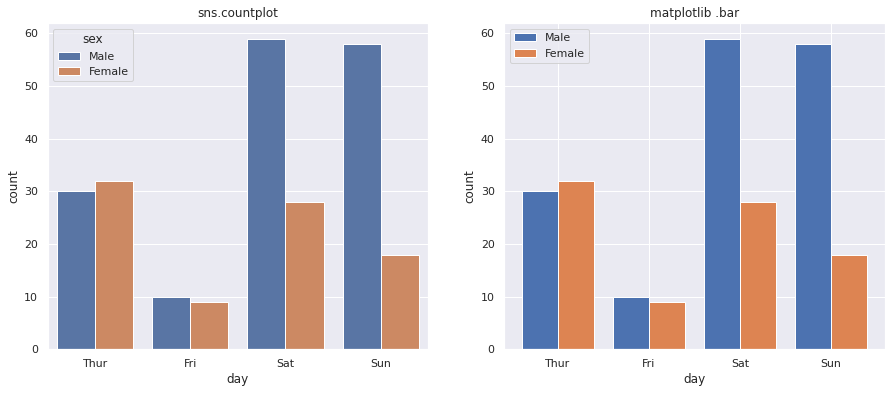

In [9]:
def cnvrt(x):
    # converting day of week to number
    if x == 'Fri':
        return 5
    elif x == 'Sat':
        return 6
    elif x == 'Sun':
        return 7
    else:
        return 0

df['numd'] = df.day.apply(cnvrt)
df.sort_values(by='numd', inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Seaborn implementation by sns.countplot
sns.countplot(x='day', hue='sex', data=df, ax=ax[0])
ax[0].set_title(u'sns.countplot')

# ----------- VS -----------

# Matplotlib implementation by .bar
grp = df.groupby(['day', 'sex']).tip.count().reset_index()
grp['numd'] = grp.day.apply(cnvrt)
grp.sort_values(by='numd', inplace=True)

xticks = grp.day.unique()
x = np.arange(len(xticks))

width = 0.4

ax[1].set_xticks(x)
ax[1].set_xticklabels(xticks)
ax[1].set_xlabel('day')
ax[1].set_ylabel('count')

ax[1].bar(x - width / 2, grp.query('sex == "Male"').tip, width, label='Male')
ax[1].bar(x + width / 2, grp.query('sex == "Female"').tip, width, label='Female')
ax[1].set_title(u'matplotlib .bar')
ax[1].legend()
plt.show()
